In [29]:
import pandas as pd
import tensorflow
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import datetime

# for jupyter
%matplotlib inline

In [30]:
dt = pd.read_csv('train.csv')
print(783/len(dt))
dt.head()

0.01804147465437788


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [35]:
def Normaliza_dados(dados):
    #d = dados.copy()
    
    d = dados[dados['gender'] != 'Other'].copy()
    # d = d[d['age'] >= 18]
    
    
    #d = d[d['work_type'] != "Never_worked" ]
    d.drop('smoking_status',axis=1,inplace=True)


    
    sim_nao = ['yes','no']
    residencia = ['Urban', 'Rural']
    smokes = ['formerly smoked', 'never smoked', 'smokes', 'Unknown']



    def set_gender(x):
        sexo = ['Male', 'Female','Other']
        r = sexo.index(x)
        if r == 2:
            r = 0.5
        return r
    
    d['gender'] = d['gender'].apply(set_gender)

    d['ever_married'] = d['ever_married'].apply( lambda x: sim_nao.index(x.lower()))
    d['Residence_type'] = d['Residence_type'].apply( lambda x: residencia.index(x))

    lista = ['Private', 'Self-employed', 'Govt_job', 'Never_worked']
    #lista = ['Private', 'Self-employed', 'Govt_job']
    for i in lista:
        d['work_type_'+i] = dt['work_type'].apply(lambda x: 1 if x == i else 0)
    #d['work'] = d['work_type'].apply(lambda x: lista.index(x))
    d = d.drop('work_type',axis=1)

    d['age'] = d['age'].apply(lambda x: x/100)
    d['avg_glucose_level'] = d['avg_glucose_level'].apply(lambda x: (x-55)/(300 - 55) )


    media_imc = d['bmi'].mean()
    d['bmi'] = d['bmi'].apply(lambda x: media_imc if (str(x) == 'nan') else x)

    d['bmi'] = d['bmi']/100

    return d
d = Normaliza_dados(dt)
d

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Private,work_type_Self-employed,work_type_Govt_job,work_type_Never_worked
0,30669,0,0.03,0,0,1,1,0.163755,0.180,0,0,0,0,0
1,30468,0,0.58,1,0,0,0,0.134531,0.392,0,1,0,0,0
2,16523,1,0.08,0,0,1,0,0.228122,0.176,0,1,0,0,0
3,56543,1,0.70,0,0,0,1,0.057306,0.359,0,1,0,0,0
4,46136,0,0.14,0,0,1,1,0.433796,0.191,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,1,0.10,0,0,1,0,0.014857,0.204,0,0,0,0,0
43396,5450,1,0.56,0,0,0,0,0.647388,0.554,0,0,0,1,0
43397,28375,1,0.82,1,0,0,0,0.150776,0.289,0,1,0,0,0
43398,27973,0,0.40,0,0,0,0,0.180245,0.332,0,1,0,0,0


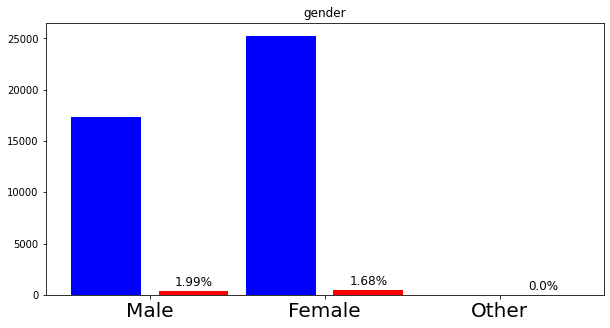

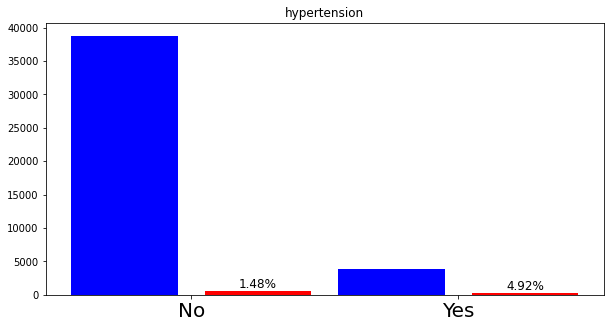

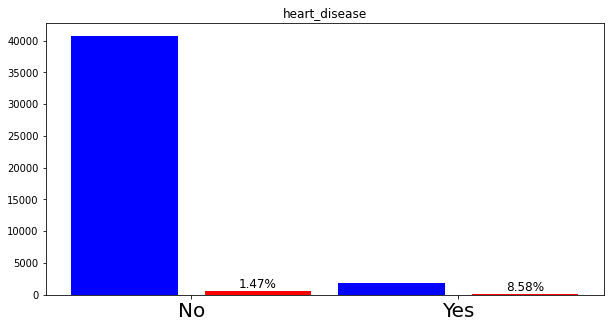

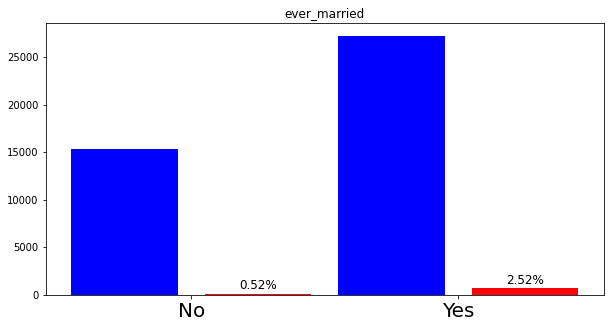

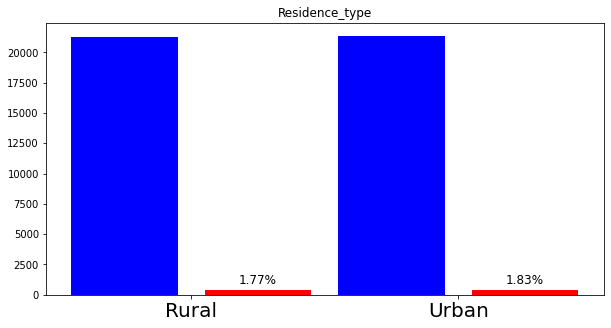

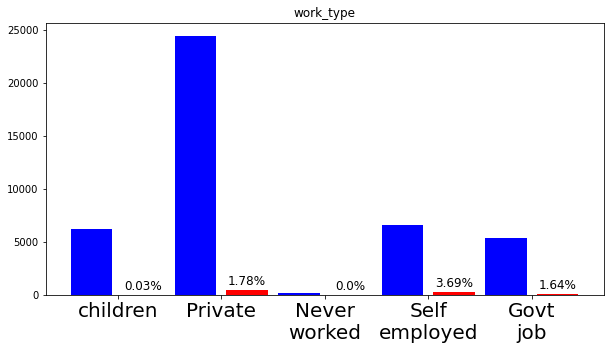

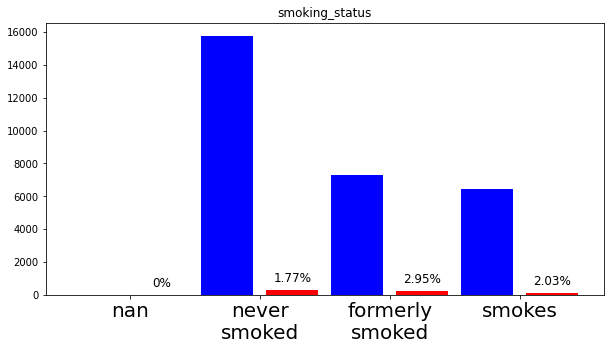

In [150]:
def strokes(x,v = 1):
    r = x[x['stroke'] == v ]
   # print('strokes positivados:',len(r))
    return r

"""a = d[d['smoking_status'].isnull()]
a[a['stroke'] == 1]
d['smoking_status'].unique()"""

def change_text(text):
    if isinstance(text,str):
        return text.replace(' ','\n').replace('_','\n').replace('-','\n')
    elif (isinstance(text,int)) or  (isinstance(text,(int, np.integer))): 
        return "Yes" if text == 1 else "No"
    elif text == None:
        return "Vazio"
    else:
        return text


plt.rcParams["figure.figsize"] = (10,5)
def plotagem(x,col):
    xs = x[col].unique()
    percents = []
    #print("COLUNA: ",col,":      ",xs)
    for i,vx in enumerate(xs):

        classe = x[ x[col] == vx ]
        p, n = len(strokes(classe,1)), len(strokes(classe,0))


        plt.bar([(i*2)],[n], color='b' )
        plt.bar([(i*2)+1],[p], color='r' )
        percent = 0
        if p+n > 0:
            percent = round((p/(p+n))*100,2)
        percents.append( [ percent, p, (i*2)+1, max(p,n)] )
                        
    plt.xticks(ticks=[ (i*2)+0.5 for i,x in enumerate(xs)], labels=[change_text(i) for i in xs],fontsize=20)
    plt.title(col)
    for v in percents:
        plt.text(v[2], v[1]+ max(a,key=lambda x: x[3])[3]*0.02, str(v[0])+"%", fontsize=12, horizontalalignment='center')
        
    plt.show( )
        #print(f"Porcentam dos positivados: {(p/(p+n) )*100:.2f}%")
    

l = [
    "gender",
    "hypertension",
    "heart_disease",
    "ever_married",
    "Residence_type",
    "work_type",
    "smoking_status"
]

for i in l:
    plotagem(dt,str(i))
 



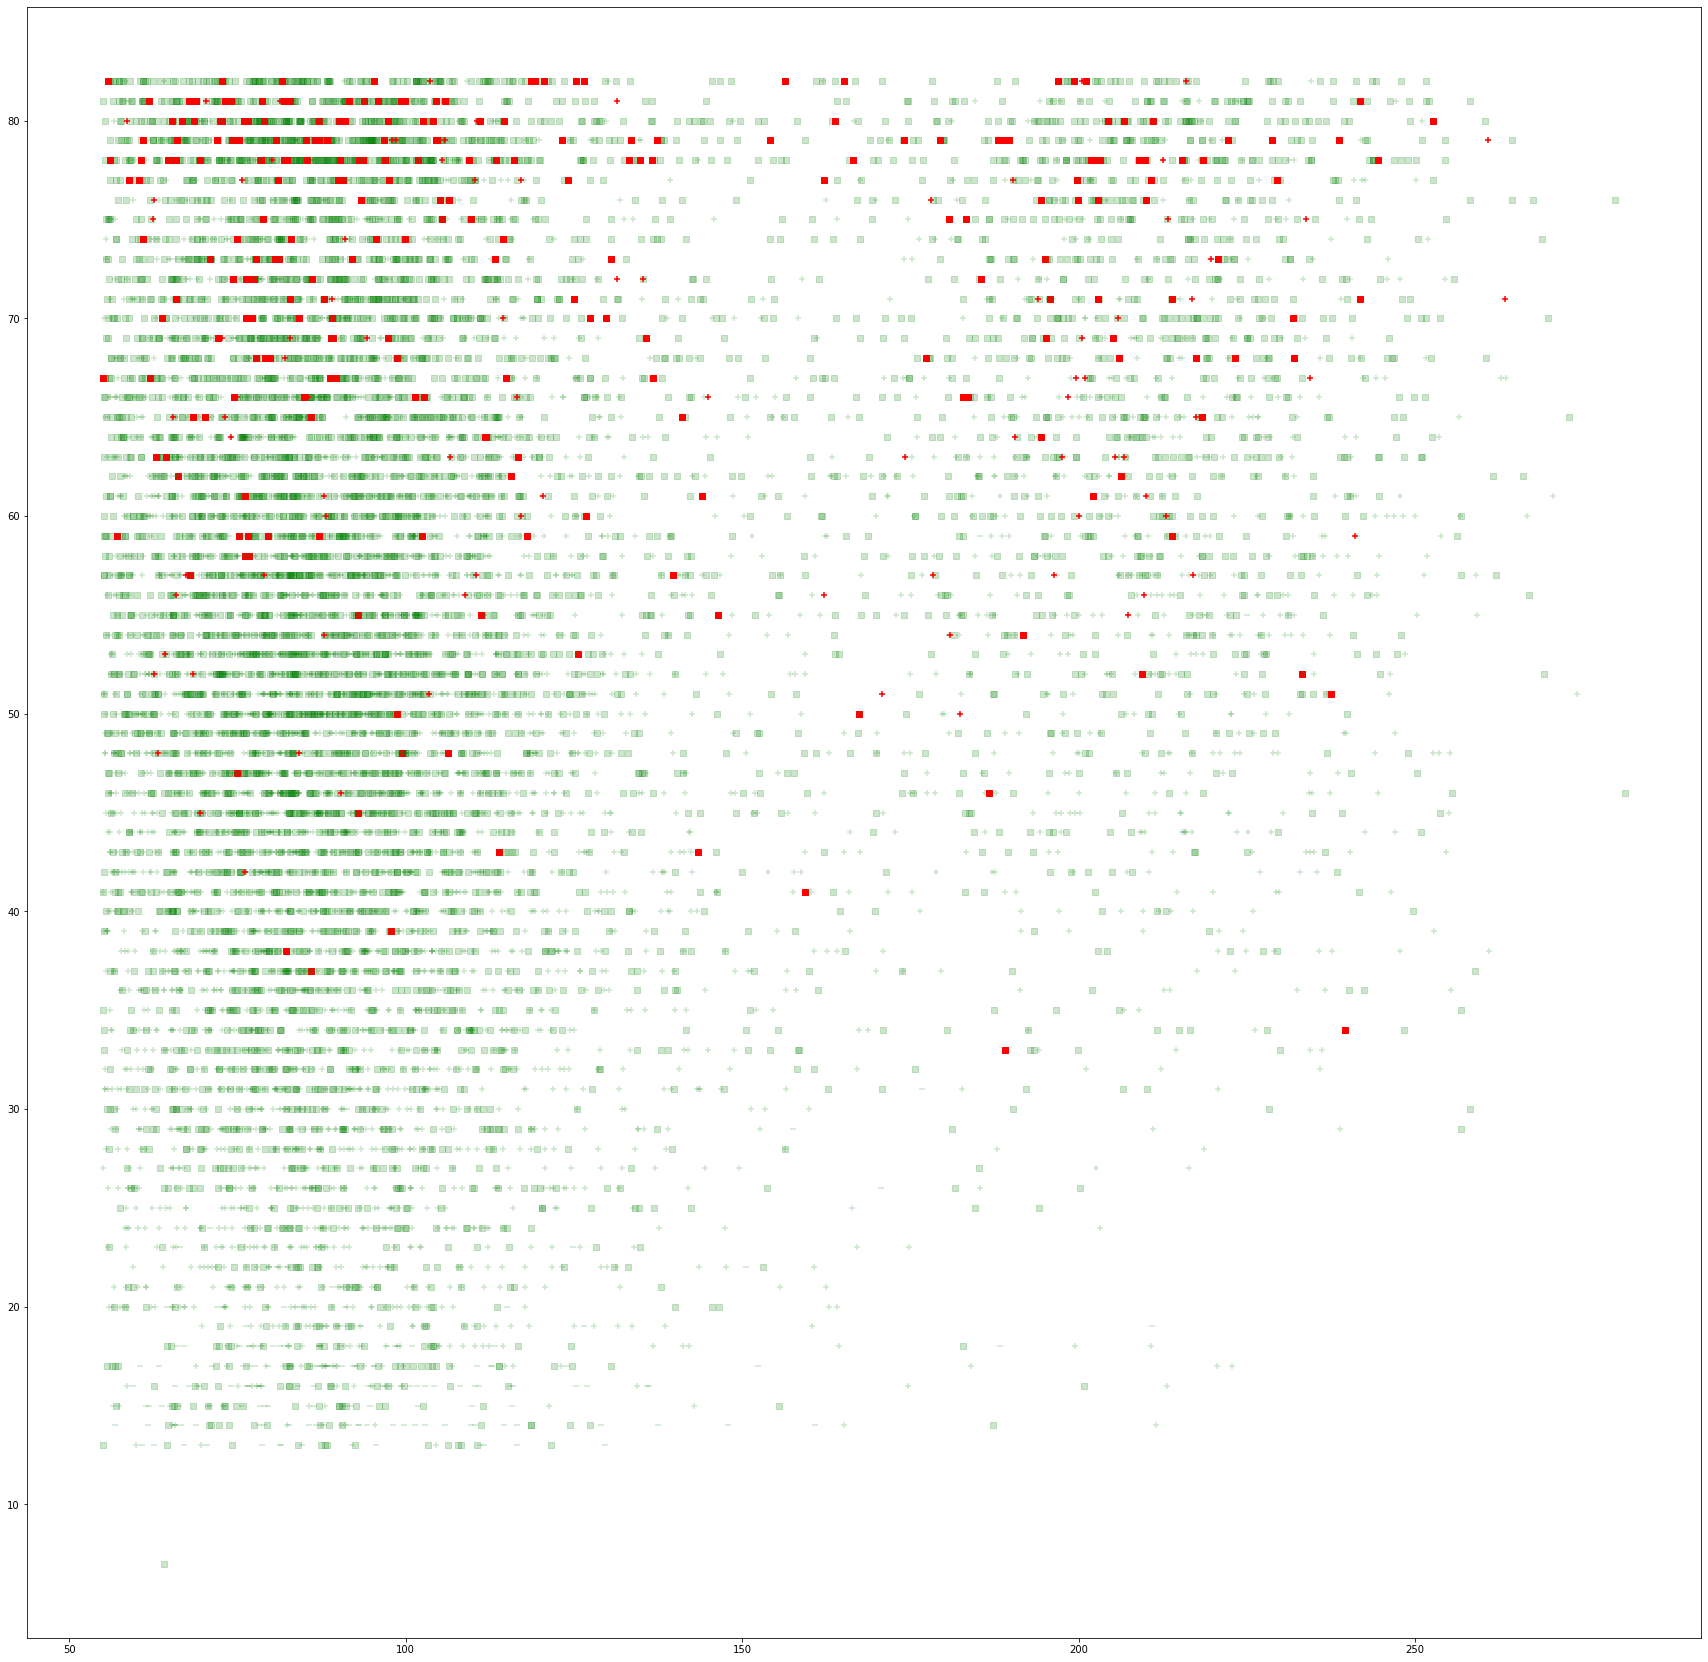

In [159]:

# "work_type_Private","work_type_Self-employed", "work_type_Govt_job",
lista = ['Private', 'Self-employed', 'Govt_job', 'Never_worked',"children"]
    
dt['work'] = dt['work_type'].apply(lambda x: lista.index(x))

plt.rcParams["figure.figsize"] = (30,30)

p = strokes(dt,1)
n = strokes(dt,0)

tp = [p[p['work'] == i] for i in range(1,4)]
tn = [n[n['work'] == i] for i in range(1,4)]

#lista = ['Private', 'Self-employed', 'Govt_job']
markers = ['s','+',0]

for i in range(3):
    plt.scatter(y=tn[i]['age'],x=tn[i]['avg_glucose_level'], c='g', alpha=0.2, marker=markers[i])
    plt.scatter(y=tp[i]['age'],x=tp[i]['avg_glucose_level'], c='r', alpha=1,  marker=markers[i])

#"smoking_status"]
 

In [6]:
"""print(len(strokes(d[d['smoking_status'].isnull()],1)))
print(len(strokes(d[d['smoking_status'].isnull()],0)))


print(len(strokes(d[d['smoking_status'] == 'smokes'],1)))
print(len(strokes(d[d['smoking_status']== 'smokes'],0)))"""


"print(len(strokes(d[d['smoking_status'].isnull()],1)))\nprint(len(strokes(d[d['smoking_status'].isnull()],0)))\n\n\nprint(len(strokes(d[d['smoking_status'] == 'smokes'],1)))\nprint(len(strokes(d[d['smoking_status']== 'smokes'],0)))"

In [7]:


dr = d['stroke']
d =d.drop('stroke',axis=1)
d =d.drop('id',axis=1)


x_tmp,x_valida,y_tmp,y_valida = train_test_split(d, dr,test_size= 0.1, random_state=0)
#x_treino,x_teste,y_treino,y_teste = train_test_split(x_tmp, y_tmp,test_size= 0.7, random_state=0)


from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
oversample = RandomOverSampler(sampling_strategy=0.5)
X_over, y_over = oversample.fit_resample(x_tmp, y_tmp)




from sklearn.model_selection import train_test_split
x_treino,x_teste,y_treino,y_teste = train_test_split(X_over,y_over,test_size=0.3,stratify=y_over,random_state=42)






In [8]:


optimizer_adam = tf.keras.optimizers.Adam(learning_rate=0.0022)

optimizer_SGD = tf.keras.optimizers.SGD(
    learning_rate=0.02975,
    momentum=0.05,
    nesterov=False,
    name='SGD')

optimizer_Adagrad = tf.keras.optimizers.Adagrad(
    learning_rate=0.001,
    initial_accumulator_value=0.01,
    epsilon=1e-02,
    name="Adagrad",

)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1,
                                                      write_images=True
                                                      )


model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(30,activation=tf.nn.relu,input_shape=(x_treino.shape[1],)))
model.add(tf.keras.layers.Dense(40,activation=tf.nn.relu ))
model.add(tf.keras.layers.Dense(20,activation=tf.nn.sigmoid ))
model.add(tf.keras.layers.Dense(1,activation=tf.nn.sigmoid ))
model.summary()
model.compile(optimizer=optimizer_adam,
              loss='MeanSquaredError',
              metrics=['accuracy','Recall'])

tf.summary.trace_on( profiler=False)

model.fit(x_treino,y_treino,batch_size=60, epochs=50,verbose=2,  validation_split=0.9,
          callbacks=[tensorboard_callback]
          )

teste  = model.evaluate(x_teste,  y_teste, verbose=2)
treino = model.evaluate(x_treino,  y_treino, verbose=2)

model.save('save/model2/'+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 40)                1240      
                                                                 
 dense_2 (Dense)             (None, 20)                820       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2,471
Trainable params: 2,471
Non-trainable params: 0
_________________________________________________________________


2022-08-04 23:00:09.915630: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-08-04 23:00:09.915677: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (archlinux): /proc/driver/nvidia/version does not exist
2022-08-04 23:00:09.916788: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
68/68 - 4s - loss: 0.2061 - accuracy: 0.6771 - recall: 0.1670 - val_loss: 0.1727 - val_accuracy: 0.7373 - val_recall: 0.5272 - 4s/epoch - 60ms/step
Epoch 2/50
68/68 - 2s - loss: 0.1672 - accuracy: 0.7479 - recall: 0.6046 - val_loss: 0.1589 - val_accuracy: 0.7558 - val_recall: 0.6171 - 2s/epoch - 24ms/step
Epoch 3/50
68/68 - 2s - loss: 0.1564 - accuracy: 0.7715 - recall: 0.6602 - val_loss: 0.1523 - val_accuracy: 0.7720 - val_recall: 0.7016 - 2s/epoch - 23ms/step
Epoch 4/50
68/68 - 2s - loss: 0.1510 - accuracy: 0.7725 - recall: 0.6738 - val_loss: 0.1494 - val_accuracy: 0.7786 - val_recall: 0.7021 - 2s/epoch - 29ms/step
Epoch 5/50
68/68 - 3s - loss: 0.1474 - accuracy: 0.7812 - recall: 0.7152 - val_loss: 0.1500 - val_accuracy: 0.7752 - val_recall: 0.7646 - 3s/epoch - 42ms/step
Epoch 6/50
68/68 - 1s - loss: 0.1449 - accuracy: 0.7928 - recall: 0.7216 - val_loss: 0.1487 - val_accuracy: 0.7786 - val_recall: 0.7590 - 1s/epoch - 16ms/step
Epoch 7/50
68/68 - 1s - loss: 0.1454 - accurac

INFO:tensorflow:Assets written to: save/model2/20220804-230115/assets


In [10]:
model.save('logs/model.h5')

In [15]:
#    --> Faz a conversão do modelo para o js
#    tensorflowjs_converter --input_format=keras logs/model.h5 server/public/model



In [ ]:
print(model.evaluate(x_valida,  y_valida, verbose=2))

In [ ]:
t = pd.read_csv("22.csv")

In [ ]:
tt = Normaliza_dados(t)
tt = tt.drop('id',axis=1)
tt

In [ ]:
valores = model.predict(tt)
valores

In [ ]:
val = [ 1 if x > 0.5 else 0 for x in valores]
print(sum(val)/len(val))
print("len:",len(val))

#df = 
df = t.copy()
df['stroke'] = val
df.drop(["gender","age","hypertension","heart_disease","ever_married","work_type","Residence_type","avg_glucose_level","bmi","smoking_status"],axis=1,inplace=True)
df.reset_index(drop=True, inplace=True)
df['id'].set_index=True


df.to_csv("final.csv",index=False)
df